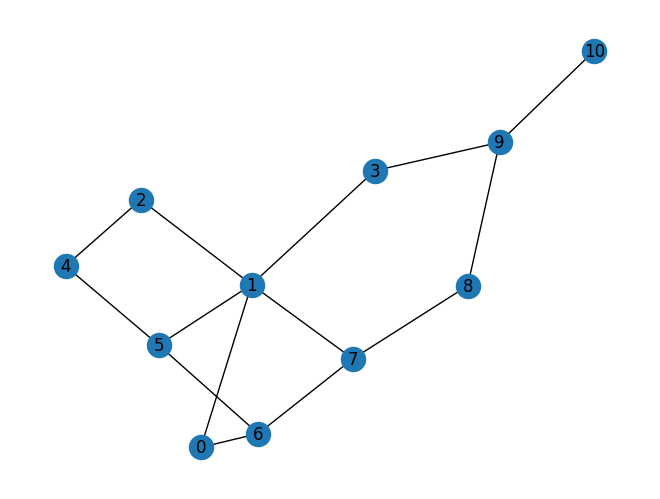

Most Efficient Path:
[0, np.int64(1), np.int64(3), np.int64(9), np.int64(10)]


/tmp/ipython-input-3907655112.py:50: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return int(np.random.choice(actions, 1))


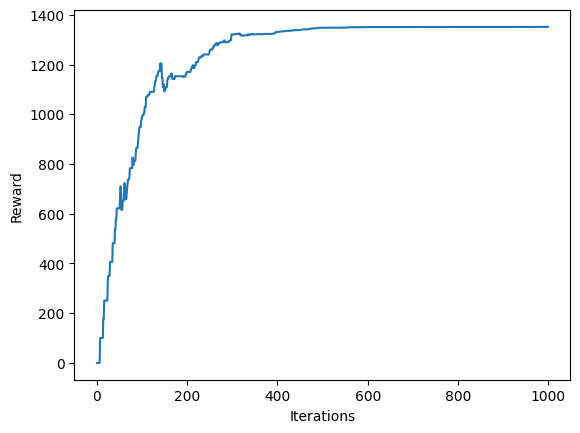

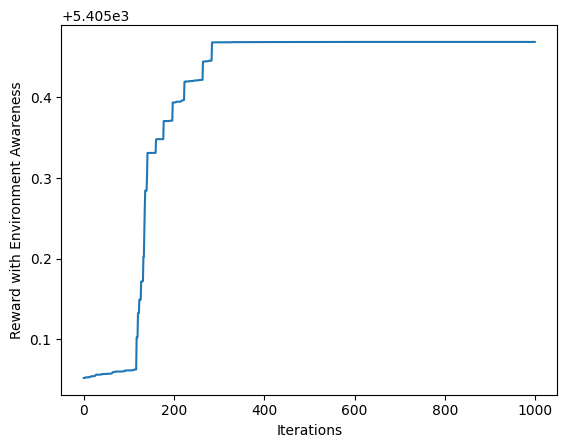

Police Matrix:
[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. 23.  0.  0. 19.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. 48.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. 45.  0.  0. 40.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. 33.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. 27.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]

Drug Traces Matrix:
[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. 18.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0. 45.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. 27.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0. 44.  0.]
 [ 0.  0.  0. 34.  0.  

In [8]:
import numpy as np
import pylab as pl
import networkx as nx

edges = [
    (0, 1), (1, 5), (5, 6), (5, 4), (1, 2),
    (1, 3), (9, 10), (2, 4), (0, 6), (6, 7),
    (8, 9), (7, 8), (1, 7), (3, 9)
]

goal = 10
MATRIX_SIZE = 11
gamma = 0.75

G = nx.Graph()
G.add_edges_from(edges)
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True)
pl.show()

M = np.full((MATRIX_SIZE, MATRIX_SIZE), -1)

for u, v in edges:
    M[u, v] = 100 if v == goal else 0
    M[v, u] = 100 if u == goal else 0

M[goal, goal] = 100

Q = np.zeros((MATRIX_SIZE, MATRIX_SIZE))

def available_actions(state):
    return np.where(M[state] >= 0)[0]

def sample_next_action(actions):
    return int(np.random.choice(actions, 1))

def update_q(current_state, action):
    max_future_q = np.max(Q[action])
    Q[current_state, action] = M[current_state, action] + gamma * max_future_q
    return np.sum(Q / np.max(Q) * 100) if np.max(Q) > 0 else 0


scores = []
for _ in range(1000):
    state = np.random.randint(0, MATRIX_SIZE)
    actions = available_actions(state)
    action = sample_next_action(actions)
    score = update_q(state, action)
    scores.append(score)


current_state = 0
path = [current_state]

while current_state != goal:
    next_state = np.argmax(Q[current_state])
    path.append(next_state)
    current_state = next_state

print("Most Efficient Path:")
print(path)

pl.plot(scores)
pl.xlabel("Iterations")
pl.ylabel("Reward")
pl.show()


police = [2, 4, 5]
drug_traces = [3, 8, 9]

env_police = np.zeros((MATRIX_SIZE, MATRIX_SIZE))
env_drugs = np.zeros((MATRIX_SIZE, MATRIX_SIZE))

def collect_environment(action):
    if action in police:
        return 'p'
    if action in drug_traces:
        return 'd'
    return None

def update_q_with_env(state, action):
    update_q(state, action)
    env = collect_environment(action)
    if env == 'p':
        env_police[state, action] += 1
    elif env == 'd':
        env_drugs[state, action] += 1

scores = []
for _ in range(1000):
    state = np.random.randint(0, MATRIX_SIZE)
    actions = available_actions(state)
    action = sample_next_action(actions)
    update_q_with_env(state, action)
    scores.append(np.sum(Q))

pl.plot(scores)
pl.xlabel("Iterations")
pl.ylabel("Reward with Environment Awareness")
pl.show()

print("Police Matrix:")
print(env_police)
print("\nDrug Traces Matrix:")
print(env_drugs)
